# Spin-Density Matrix viewer
The notebook gives interactive tools to plot SDM of the mass-independent analysis

### Define methods to load the data
The files are stored as simple text files with $88\times88$ numbers
 - `.re` for the real part
 - `.im` for the imaginary part

In [14]:
function loadSDMs(tname)
    Nb = 100; Nw = 88
    sdms = Array{Complex{Float64},3}(Nb,Nw,Nw);
    sdmes = Array{Complex{Float64},3}(Nb,Nw,Nw);
    for i in 1:Nb
        sdm  = readdlm("$(tname)/sdm$(i).re")+1im*readdlm("$(tname)/sdm$(i).im")
        sdme = readdlm("$(tname)/sdm$(i)-err.re")+1im*readdlm("$(tname)/sdm$(i)-err.im")
        sdms[i,:,:] .= sdm
        sdmes[i,:,:] .= sdme
    end
    return sdms, sdmes
end

loadSDMs (generic function with 1 method)

In [21]:
bins = linspace(0.5,2.5,101);
mnXb = collect(bins)[1:end-1]+0.01;

In [182]:
using Plots
using Interact
using DataStructures

In [46]:
push!(LOAD_PATH,"src")
using amplitudes_compass: wavenames

In [65]:
const tprime_names = ["0.100000-0.112853", "0.112853-0.127471", "0.127471-0.144385", "0.144385-0.164401",
    "0.164401-0.188816", "0.188816-0.219907", "0.219907-0.262177", "0.262177-0.326380", "0.326380-0.448588", 
    "0.448588-0.724294", "0.724294-1.000000"];

In [68]:
function combineSDMsFromTprime(folder)
    Nt=11; Nb = 100; Nw = 88
    sdms = Array{Complex{Float64},4}(Nt,Nb,Nw,Nw);
    sdmes = Array{Complex{Float64},4}(Nt,Nb,Nw,Nw);
    for (t,tname) in enumerate(tprime_names)
        println(joinpath(folder,tname))
        SDMs, SDMes = loadSDMs(joinpath(folder,tname));
        sdms[t,:,:,:] .= SDMs
        sdmes[t,:,:,:] .= SDMes
    end
    sdms, sdmes
end

combineSDMsFromTprime (generic function with 1 method)

### Read in the partial wave results

In [69]:
@time all_SDMs, all_SDMes = combineSDMsFromTprime("SDMs");

SDMs/0.100000-0.112853
SDMs/0.112853-0.127471
SDMs/0.127471-0.144385
SDMs/0.144385-0.164401
SDMs/0.164401-0.188816
SDMs/0.188816-0.219907
SDMs/0.219907-0.262177
SDMs/0.262177-0.326380
SDMs/0.326380-0.448588
SDMs/0.448588-0.724294
SDMs/0.724294-1.000000
 47.260696 seconds (68.32 M allocations: 4.417 GiB, 3.92% gc time)


In [61]:
size(all_SDMs)

(11, 100, 88, 88)

Interact.Options{:SelectionSlider,Int64}(135: "input-49" = 44 Int64 , "wavei", 44, "44", 44, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(68=>"68",2=>"2",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42",29=>"29"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(137: "input-50" = 6 Int64 , "trimei", 6, "6", 6, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Any}(139: "input-51" = auto Any , "scale", :auto, "auto", 1, Interact.OptionDict(DataStructures.OrderedDict{String,Any}("auto"=>:auto,"fixed"=>(0, 240000)), Dict{Any,String}(Pair{Any,String}(:auto, "auto"),Pair{Any,String}((0, 240000), "fixed"))), Any[], Any[], true, "horizontal", true)

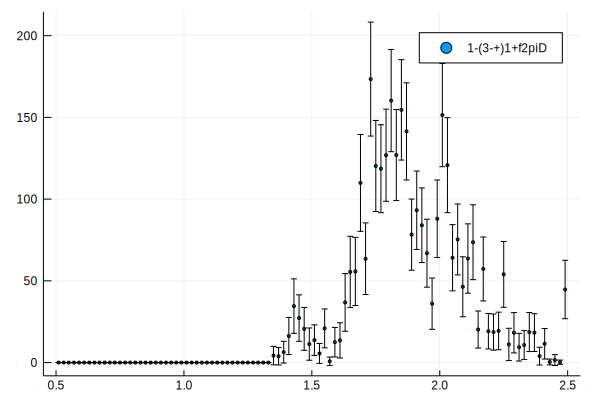

In [77]:
@manipulate for wavei = 1:88, trimei = 1:11,scale=Dict("auto"=>:auto, "fixed"=>(0,240000))
    plot(mnXb,real.(all_SDMs[trimei,:,wavei,wavei]), yerr = real.(all_SDMes[trimei,:,wavei,wavei]),
        l=nothing, ylim=scale, m=(2, stroke(1,:black)),
        lab=wavenames[wavei])
end

In [ ]:
shorten_wavenames = [replace(replace(replace(w,"1-(","("),"pi"," "),"(  )_S","(pipi)_S") for w in wavenames]

In [154]:
gr() # or plotly

Plots.GRBackend()

In [174]:
function create_interactive_plot_vs_mass(what_to_plot, what_to_error, title="";
        fixed_range::Tuple{Float64,Float64}=(0.0,1.0))
    @manipulate for wavei = OrderedDict(shorten_wavenames[i] => i for i = 1:88),
        tprimei = 1:11, scale=Dict("auto"=>:auto, "fixed"=>fixed_range)
        plot(mnXb,what_to_plot(tprimei, wavei), yerr = what_to_error(tprimei, wavei),
            l=nothing, ylim=scale, m=(2, stroke(1,:black)),
            lab="", size=(900,500), title=title, xlab="M3pi (GeV)")
    end
end

create_interactive_plot_vs_mass (generic function with 3 methods)

Interact.Options{:ToggleButtons,Any}(407: "input-157" = 1 Any , "wavei", 1, "flat", 1, Interact.OptionDict(DataStructures.OrderedDict{String,Any}("flat"=>1,"(1++)0+rho S"=>2,"(0-+)0+(pipi)_S S"=>3,"(0-+)0+f0(980) S"=>4,"(0-+)0+rho P"=>5,"(0-+)0+f0(1500) S"=>6,"(0-+)0+f2 D"=>7,"(1++)1+rho S"=>8,"(1++)0+rho D"=>9,"(1++)1+rho D"=>10…), Dict{Any,String}(Pair{Any,String}(68, "(5++)0+rho3 D"),Pair{Any,String}(2, "(1++)0+rho S"),Pair{Any,String}(11, "(1++)0+(pipi)_S P"),Pair{Any,String}(39, "(2-+)1+rho3 P"),Pair{Any,String}(46, "(3++)1+rho D"),Pair{Any,String}(85, "(2++)0-rho D"),Pair{Any,String}(25, "(2++)1+rho3 D"),Pair{Any,String}(55, "(3++)1+(pipi)_S F"),Pair{Any,String}(42, "(2-+)0+f0(980) D"),Pair{Any,String}(29, "(2-+)0+f2 D")…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(409: "input-158" = 6 Int64 , "tprimei", 6, "6", 6, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Any}(411: "input-159" = auto Any , "scale", :auto, "auto", 1, Interact.OptionDict(DataStructures.OrderedDict{String,Any}("auto"=>:auto,"fixed"=>(0.0, 200000.0)), Dict{Any,String}(Pair{Any,String}((0.0, 200000.0), "fixed"),Pair{Any,String}(:auto, "auto"))), Any[], Any[], true, "horizontal", true)

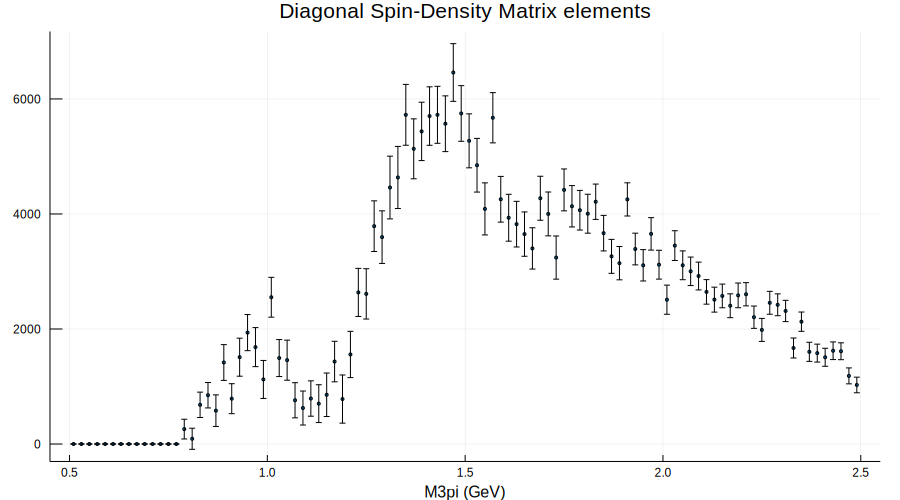

In [179]:
create_interactive_plot_vs_mass(
    (tprimei, wavei)->real.(all_SDMs[tprimei,:,wavei,wavei]),
    (tprimei, wavei)->real.(all_SDMes[tprimei,:,wavei,wavei]),
    "Diagonal Spin-Density Matrix elements"; fixed_range=(0.0,2e5))

Interact.Options{:ToggleButtons,Any}(423: "input-163" = 1 Any , "wavei", 1, "flat", 1, Interact.OptionDict(DataStructures.OrderedDict{String,Any}("flat"=>1,"(1++)0+rho S"=>2,"(0-+)0+(pipi)_S S"=>3,"(0-+)0+f0(980) S"=>4,"(0-+)0+rho P"=>5,"(0-+)0+f0(1500) S"=>6,"(0-+)0+f2 D"=>7,"(1++)1+rho S"=>8,"(1++)0+rho D"=>9,"(1++)1+rho D"=>10…), Dict{Any,String}(Pair{Any,String}(68, "(5++)0+rho3 D"),Pair{Any,String}(2, "(1++)0+rho S"),Pair{Any,String}(11, "(1++)0+(pipi)_S P"),Pair{Any,String}(39, "(2-+)1+rho3 P"),Pair{Any,String}(46, "(3++)1+rho D"),Pair{Any,String}(85, "(2++)0-rho D"),Pair{Any,String}(25, "(2++)1+rho3 D"),Pair{Any,String}(55, "(3++)1+(pipi)_S F"),Pair{Any,String}(42, "(2-+)0+f0(980) D"),Pair{Any,String}(29, "(2-+)0+f2 D")…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(425: "input-164" = 6 Int64 , "tprimei", 6, "6", 6, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Any}(427: "input-165" = auto Any , "scale", :auto, "auto", 1, Interact.OptionDict(DataStructures.OrderedDict{String,Any}("auto"=>:auto,"fixed"=>(-180.0, 180.0)), Dict{Any,String}(Pair{Any,String}((-180.0, 180.0), "fixed"),Pair{Any,String}(:auto, "auto"))), Any[], Any[], true, "horizontal", true)

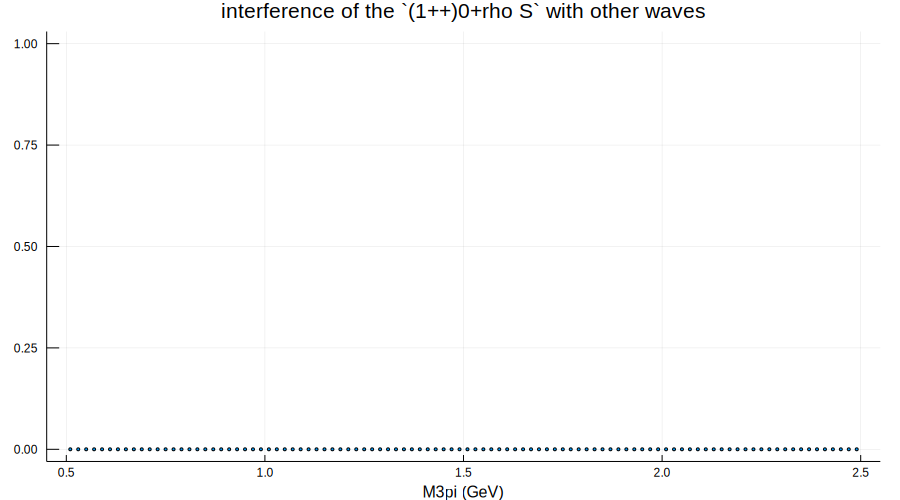

In [181]:
refwave = 2
arg(z) = atan2(imag(z), real(z))/π*180;
darg(dz,z) = sqrt(real(z)^2*imag(dz)^2+imag(z)^2*real(dz)^2)/abs2(z)
create_interactive_plot_vs_mass(
    (tprimei, wavei)->arg.(all_SDMs[tprimei,:,refwave,wavei]),
    (tprimei, wavei)->[darg(all_SDMes[tprimei,i,refwave,wavei],all_SDMs[tprimei,i,refwave,wavei])/π*180 for i in 1:88],
    "interference of the `"*shorten_wavenames[2]*"` with other waves"; fixed_range=(-180.0,180.0))

Interact.Options{:SelectionSlider,Int64}(149: "input-54" = 50 Int64 , "bin", 50, "50", 50, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(151: "input-55" = 6 Int64 , "tprimei", 6, "6", 6, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)), Any[], Any[], true, "horizontal", true)

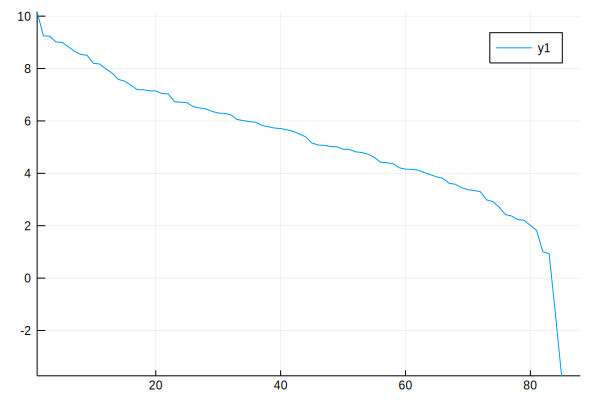

In [85]:
@manipulate for bin=1:100, tprimei = 1:11
    plot(log.(sort(real.(diag(all_SDMs[tprimei,bin,:,:])), rev=true)))
end